# Image Classification - Capstone Project

**Background**


As a final project of my Udacity Nanodegree Program I decided to go a bit deeper into Deep Learning and go through an exercise within Image Classification. As Udacity has a prepared project with Dog Breed classification as an option I decided to do my classification project within dog breeds as well. That said. I have not followed the prepared project and instead created my own project from scratch. I did this as I wanted to learn Tensorflow a bit deeper and also handle all the data preparation aspects of the project as well. I have written a seperate Medium post going through this project and you can find that article <a href="">here</a>. 



* [Step 1](#step1): Load and prepare data
* [Step 2](#step2): Create a CNN to Classify Dog Breeds
* [Step 3](#step3): Use a CNN to Classify Dog Breeds - Using Transfer Learning
* [Step 4](#step4): Data Agumentation
* [Step 5](#step5): Training new CNN after Data Augmentation
* [Step 6](#step6): Save model to use in application
* [Step 7](#step7): Discussion & Conclusions



**The data**

The data is downloaded from a Kaggle challenge but originates from Stanford and includes 120 different dog breeds within the over 20.000 images. For my work I will use about half of the available pictures (~10.000).  

**My Goals**

* Get an understanding of Tensorflow as a deep learning library
* Explore different options of data preperation for deep learning with Tensorflow
* Explore different options of data agumentation with the use of Tensorflow
* Create a Image Classifier using a Convolutional Neural Network from scratch
* Create a Image Classifier using a Convolutional Neural Network with the use of Transfer Learning

Okey. Lets get started and import some libraries needed for our work. 

**Import libraries**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.enable_eager_execution()


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

<a id='step1'></a>

## Step 1 - Load and prepare data

The dataset comes from Kaggle and can be accessed here [Kaggle Dog Breed Classification](https://https://www.kaggle.com/c/dog-breed-identification)

In [0]:
dog_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1567068413&Signature=LqOEv6dmlRK5A1fAJIttFraLEsFz8YA%2Bu3Jhkjg7Fk58SIVO8%2BmzDb%2Fhr37bXXOAVgGuFL%2Fa3NbEPPs4WqaaTTVQ0KIrwQJTqPmJrA9UWm05cavQ7%2BBlqHjzUo6bs5ajCPkC7ozaf7crCp5unlz1mzciKXIo9EKpwkgTvRoEdZsCFpFpHOYwyw91Tgzhmkka95ARi6IMdEZdGeySuYGB3KrRtznHVCU7lUfd5%2FhAcv76o3QzwCElDDSC7fx8cwSsCTzfNWSBMGVAHxDJtUsKYuC2fSe4rt0SrNnqTRWfs9WEnwpzO2G1FNPFkKdl5EqA%2BYVtQpnUxFP8SgAn1mY5Lw%3D%3D&response-content-disposition=attachment%3B+filename%3Ddog-breed-identification.zip'
zip_dir = tf.keras.utils.get_file('dog-breed-identification.zip', origin=dog_url, extract=True)

723329024/723322089 [==============================] - 5s 0us/step


Performing file/OS operations to place file in the right location on VM.

In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets


In [0]:
!unzip /root/.keras/datasets/train.zip
!cp /root/.keras/datasets/labels.csv /content
!ls

Archive:  /root/.keras/datasets/train.zip
   creating: train/
  inflating: train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: train/0075dc49dab4024d12fafe67074d8a81.jpg  
  inflating: train/00792e341f3c6eb33663e415d0715370.jpg  
  inflatin

Listing number of images

In [0]:
num_dogs_tr = len(os.listdir('train'))
print('total training dog images:', num_dogs_tr)

total training dog images: 10222


In [0]:
my_path = !pwd
my_path[0]

'/content'

Creating a list of all paths to the images in the train folder

In [0]:
import pathlib

data_root = pathlib.Path(my_path[0])

all_image_paths = list(data_root.glob('train/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

10222

In [0]:
all_image_paths[:10]

['/content/train/5dc9c12f0878656c49d97c6bb9dd3aa0.jpg',
 '/content/train/4001319125d18708cf2d148a43f4e968.jpg',
 '/content/train/84e567b15311f0c891858f56f0175867.jpg',
 '/content/train/b5982ad65efe3045bccfad767bfae41f.jpg',
 '/content/train/43337a20c5afaf0cae4b37a7cdf5897e.jpg',
 '/content/train/1e34a978b4d2b36592d2a3db6b3f4571.jpg',
 '/content/train/e2399ad3385db144d54b63986e8247f1.jpg',
 '/content/train/88110fa3bbc63e4a6451f8b94f1c16ad.jpg',
 '/content/train/ff2523c07da7a6cbeeb7c8f8dafed24f.jpg',
 '/content/train/c32970356e71b965d203a0617fe1ecde.jpg']

Look at three random images from the training set

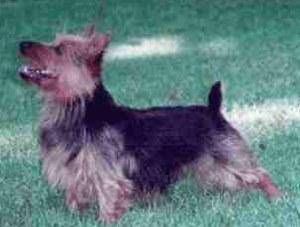

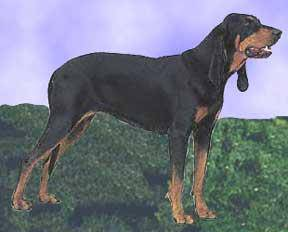

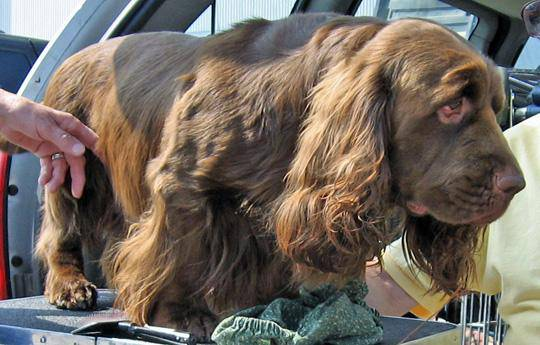

In [0]:
import IPython.display as display
import random

for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print()

Now looking closer to the label data from the labels.csv file.

In [0]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
dog_class = list(labels['breed'].unique())
dog_class.sort()

In [0]:
dog_class[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

Create a dictionary with the name of the dogs with a corresponding number


In [0]:
label_to_index = dict((name, index) for index,name in enumerate(dog_class))


Loop through label dataframe and create a list of labels matching 'all_image_paths'


In [0]:
label_list = []
for img_path in all_image_paths :
  image = img_path[15:-4]
  breed = labels[labels['id'] == image]['breed'].values[0]
  index = label_to_index[breed]
  label_list.append(index)

In [0]:
print("First 10 labels indices: ", label_list[:10])

First 10 labels indices:  [54, 35, 112, 41, 17, 68, 116, 22, 79, 93]


In [0]:
img_path = all_image_paths[0]
img_path

'/content/train/5dc9c12f0878656c49d97c6bb9dd3aa0.jpg'

**Importing data into Tensorflow**

Now it is time to convert our images into a format that we can use in our soon to be created Neural Network. The way to do this is to create tensors out of the images. This is done using the tensorflow Data API. Specifically we use `tf.data.Dataset.from_tensor_slices()` method.
<br><br>


In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
print(path_ds)

<DatasetV1Adapter shapes: (), types: tf.string>


**Pre-processing Images - Functions**

After we have created a Dataset out of the image path list we can start to process the images and converting them to matrices of actual numbers that we can send into our DL model. 

In [0]:
#function to pre-process the images
def pre_process_image(image):
  final_image = tf.image.decode_jpeg(image, channels=3)
  final_image = tf.image.resize(final_image, [224, 224])
  final_image /=255.0
  
  return final_image

In [0]:
#function to load, read the images and use pre-process function
def load_and_process(image):
  image = tf.read_file(image)
  return pre_process_image(image)

We do this by using the `map` function on the path dataset. The map function lets us use our own function and apply it on all the entries we have in our path dataset. This means we can use the above functions to:
1. read the images into list of tensors
2. decode each tensor
3. resize to 224,224 pixels
4. normalize the data to be between 0 and 1. 

In [0]:
image_ds = path_ds.map(load_and_process, num_parallel_calls=AUTOTUNE)

To look what one of the images now looks like we can create an `iterator ` and iterate over one file showing us the 3D array of data point per image. All of the values now between 0 and 1 because of the normalization function. 

In [0]:
iterator = image_ds.make_one_shot_iterator()
iterator.get_next()

W0827 12:11:55.668427 140153986549632 deprecation.py:323] From <ipython-input-25-fdb156bf9d8a>:1: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


<tf.Tensor: id=23, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.88235295, 0.8039216 , 0.69803923],
        [0.88235295, 0.8039216 , 0.69803923],
        [0.88235295, 0.8039216 , 0.69803923],
        ...,
        [0.7295518 , 0.67058825, 0.5960084 ],
        [0.7268907 , 0.67058825, 0.59859955],
        [0.72156864, 0.67058825, 0.6039216 ]],

       [[0.88235295, 0.8039216 , 0.69803923],
        [0.88235295, 0.8039216 , 0.69803923],
        [0.88235295, 0.8039216 , 0.69803923],
        ...,
        [0.7295518 , 0.67058825, 0.5960084 ],
        [0.7268907 , 0.67058825, 0.59608966],
        [0.72156864, 0.67058825, 0.59611344]],

       [[0.8862745 , 0.80784315, 0.7019608 ],
        [0.8862745 , 0.80784315, 0.7019608 ],
        [0.8862745 , 0.80784315, 0.7019608 ],
        ...,
        [0.7295518 , 0.67058825, 0.5883741 ],
        [0.7268907 , 0.67058825, 0.5908039 ],
        [0.72156864, 0.67058825, 0.59607846]],

       ...,

       [[0.99215686, 0.9922094 , 0.94504553],
      

Lets also look at some of the pictures we have and that the size has been changed. 

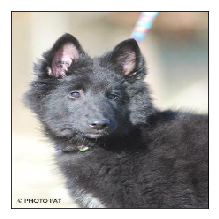

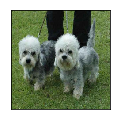

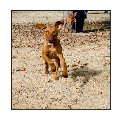

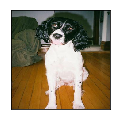

In [0]:
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()

**A dataset of (image, label) pairs**

We also need to create a Dataset of the labels so we can combine the two Datasets into one. This is done below in the same way we did with the list of all the paths to the images. In this case we also perform a `cast` function on the data to make sure it is in tf.int64 format.

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(label_list, tf.int64))

In [0]:
iterator = label_ds.make_one_shot_iterator()
iterator.get_next()

<tf.Tensor: id=48, shape=(), dtype=int64, numpy=54>

In [0]:
for label in label_ds.take(10):
  print(dog_class[label.numpy()])

groenendael
dandie_dinmont
vizsla
english_springer
border_terrier
lakeland_terrier
west_highland_white_terrier
brabancon_griffon
norfolk_terrier
saluki


After creating both the Image and Labels dataset we can combine the two into one Tensorflow Dataset. 

In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [0]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>


<a id='step2'></a>

## Step 2: Create a CNN to Classify Dog Breeds - From Scratch

To finalize preparing the data we can add a couple of parameters to handle batching of the dataset elements. Below I have added the shuffle function - to shuffle all the images before training. I have also added the repeat method to allow the iterator to continuously extract data from this dataset. Finally the batch method with a value of 32. 

To keep track of how we are doing, not only on the training data but on data the model has not seen yet we need to create a validation and a testing dataset from our **image_label_ds** dataset. I will in this project use 15% of the data for validation and another 15% for testing. 

In [0]:
DATASET_SIZE = 10222

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = image_label_ds.take(train_size)
test_dataset = image_label_ds.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

Lets also look how one tensor looks like. 

In [0]:
iterator = train_dataset.make_one_shot_iterator()
iterator.get_next()

(<tf.Tensor: id=230430, shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.88235295, 0.8039216 , 0.69803923],
         [0.88235295, 0.8039216 , 0.69803923],
         [0.88235295, 0.8039216 , 0.69803923],
         ...,
         [0.7295518 , 0.67058825, 0.5960084 ],
         [0.7268907 , 0.67058825, 0.59859955],
         [0.72156864, 0.67058825, 0.6039216 ]],
 
        [[0.88235295, 0.8039216 , 0.69803923],
         [0.88235295, 0.8039216 , 0.69803923],
         [0.88235295, 0.8039216 , 0.69803923],
         ...,
         [0.7295518 , 0.67058825, 0.5960084 ],
         [0.7268907 , 0.67058825, 0.59608966],
         [0.72156864, 0.67058825, 0.59611344]],
 
        [[0.8862745 , 0.80784315, 0.7019608 ],
         [0.8862745 , 0.80784315, 0.7019608 ],
         [0.8862745 , 0.80784315, 0.7019608 ],
         ...,
         [0.7295518 , 0.67058825, 0.5883741 ],
         [0.7268907 , 0.67058825, 0.5908039 ],
         [0.72156864, 0.67058825, 0.59607846]],
 
        ...,
 
        [[0.99215686,

Below we will perform som operations on the dataset. We will shuffle the data. We add a prefetch function as well as setting the batch size. This means we will send 32 images in one batch through the network for training and by this making the trainning go faster and also not as fine tuned as when sending in one image at a time. 

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset = train_dataset.shuffle(train_size)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

Below we set up our initial network architecture. With two convulutional layers and the use of max pooling we do feature learning. To this we add the actual classification with one dense layer with relu activation after flattening the images. We also add two drop out layers to restrict overfitting. In the end we have a activation function with the use of softmax. 

In [ ]:
model_one = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),

   tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
        
   tf.keras.layers.Flatten(),
    
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(120, activation='softmax')
])

In [0]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

After creating the architecture we compile the model chosing an optimizer, loss function and what metrics to measure.

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

Below you can see a summary of the architecture and all the individual layers.

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [0]:
len(model.trainable_variables)

8

Now its time to do our first training for this project. This will be using a completely new convolutional network which has not seen any images before and will have completely random values in the start of our training. We do not expect this model to perform very well. 
<br><br>
To train a model we use the `fit` method on the newly created model. 

In [0]:
EPOCHS=20
model_results = model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy()
         )

Epoch 1/20


W0826 08:59:25.411391 140577410426752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


224/224 [==============================] - 40s 180ms/step - loss: 4.9078 - acc: 0.0098 - val_loss: 4.7721 - val_acc: 0.0176
Epoch 2/20
224/224 [==============================] - 29s 130ms/step - loss: 4.6116 - acc: 0.0395 - val_loss: 4.6648 - val_acc: 0.0189
Epoch 3/20
224/224 [==============================] - 30s 132ms/step - loss: 3.3892 - acc: 0.2480 - val_loss: 4.9424 - val_acc: 0.0319
Epoch 4/20
224/224 [==============================] - 29s 130ms/step - loss: 1.0865 - acc: 0.7476 - val_loss: 6.7305 - val_acc: 0.0306
Epoch 5/20
224/224 [==============================] - 30s 132ms/step - loss: 0.2563 - acc: 0.9477 - val_loss: 7.7806 - val_acc: 0.0352
Epoch 6/20
224/224 [==============================] - 29s 131ms/step - loss: 0.1171 - acc: 0.9764 - val_loss: 8.1923 - val_acc: 0.0378
Epoch 7/20
224/224 [==============================] - 30s 132ms/step - loss: 0.0792 - acc: 0.9841 - val_loss: 8.3023 - val_acc: 0.0319
Epoch 8/20
224/224 [==============================] - 29s 131ms/st

In [0]:
model.evaluate(test_dataset,
               verbose=1
               )

48/48 [==============================] - 10s 203ms/step - loss: 9.7021 - acc: 0.0300


[9.702071756124496, 0.030006522]

Results show that we have a 3% accuracy after 20 epochs. We also get a training accuracy of almost 100%. This is of course the result of a very overfitting model. The model has learnt the training data by heart but can not apply the training on completely new data ending up with 3% accuracy on the test data. We need to adjust the architecure to handle this overfitting somehow. 
<br><br>
See graphs below to illustrate this even more clearly. 

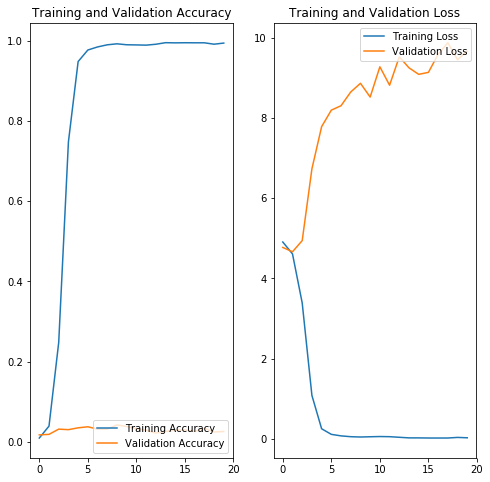

In [0]:
acc = model_results.history['acc']
val_acc = model_results.history['val_acc']

loss = model_results.history['loss']
val_loss = model_results.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Results from first model**: The modle created is highly overfitting with a really good accuracy for the training data but horrible accuracy on the test and validation data. Tuning will be needed to get better results. 

### Tuning the model

Ok. Now its time to tune the model a bit. As it is overfitting by a lot we need to make the model more general and not so specific. The last model had over 50 million paramaters in the architecture. We need to bring that down and tweak other parameters. 

In architecture number two here we will add two more convolutional layers reducing the features/parameters used to train the model. We also add the padding setting with the `option = 'same'`. "SAME" equal the fact that output size will be the same as input size. This requires the filter window to slip outside the input map, hence the need to pad. Adding a Global Average Pooling layer in the end before flattening will calculate the average output of each feature map in the previous layer. All these fairly simple operation reduces the features/parameters significantly and prepares the model for the final classification layer.

In [0]:
model_two = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),

   tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    
   tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    
   tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.GlobalAveragePooling2D(),
    
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(120, activation='softmax')
])

Complie the model.

In [0]:
model_two.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [0]:
model_two.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)      

Now we have 225.048 parameters instead of over 40 million. This will hopefully reduce the overfitting we saw in the first model. Lets train the model for 20 epochs and see how we do on the test and validation data.

In [0]:
EPOCHS=20
model_results_two = model_two.fit(train_dataset,
          validation_data=val_dataset,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy(),
          callbacks=callbacks_list
         )

Epoch 1/20
223/224 [============================>.] - ETA: 0s - loss: 4.7818 - acc: 0.0111

W0823 09:18:23.618643 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00001: val_acc improved from -inf to 0.00456, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 32s 142ms/step - loss: 4.7816 - acc: 0.0112 - val_loss: 4.7868 - val_acc: 0.0046
Epoch 2/20
223/224 [============================>.] - ETA: 0s - loss: 4.7798 - acc: 0.0102

W0823 09:18:49.113394 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00002: val_acc improved from 0.00456 to 0.00978, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 25s 114ms/step - loss: 4.7798 - acc: 0.0103 - val_loss: 4.7865 - val_acc: 0.0098
Epoch 3/20
223/224 [============================>.] - ETA: 0s - loss: 4.7768 - acc: 0.0097
Epoch 00003: val_acc did not improve from 0.00978
224/224 [==============================] - 26s 115ms/step - loss: 4.7765 - acc: 0.0096 - val_loss: 4.7805 - val_acc: 0.0098
Epoch 4/20
223/224 [============================>.] - ETA: 0s - loss: 4.7526 - acc: 0.0149
Epoch 00004: val_acc did not improve from 0.00978
224/224 [==============================] - 25s 113ms/step - loss: 4.7526 - acc: 0.0148 - val_loss: 4.7605 - val_acc: 0.0091
Epoch 5/20
223/224 [============================>.] - ETA: 0s - loss: 4.7261 - acc: 0.0139

W0823 09:20:06.127109 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00005: val_acc improved from 0.00978 to 0.01369, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.7260 - acc: 0.0142 - val_loss: 4.7410 - val_acc: 0.0137
Epoch 6/20
223/224 [============================>.] - ETA: 0s - loss: 4.6940 - acc: 0.0164
Epoch 00006: val_acc did not improve from 0.01369
224/224 [==============================] - 26s 114ms/step - loss: 4.6941 - acc: 0.0163 - val_loss: 4.7285 - val_acc: 0.0137
Epoch 7/20
223/224 [============================>.] - ETA: 0s - loss: 4.6435 - acc: 0.0227

W0823 09:20:57.413828 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00007: val_acc improved from 0.01369 to 0.02151, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.6436 - acc: 0.0226 - val_loss: 4.6587 - val_acc: 0.0215
Epoch 8/20
223/224 [============================>.] - ETA: 0s - loss: 4.5736 - acc: 0.0238

W0823 09:21:22.898422 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00008: val_acc improved from 0.02151 to 0.02738, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 25s 114ms/step - loss: 4.5734 - acc: 0.0237 - val_loss: 4.6256 - val_acc: 0.0274
Epoch 9/20
223/224 [============================>.] - ETA: 0s - loss: 4.4934 - acc: 0.0328

W0823 09:21:49.059534 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00009: val_acc improved from 0.02738 to 0.04237, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 117ms/step - loss: 4.4930 - acc: 0.0326 - val_loss: 4.4832 - val_acc: 0.0424
Epoch 10/20
223/224 [============================>.] - ETA: 0s - loss: 4.4099 - acc: 0.0383

W0823 09:22:14.621099 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00010: val_acc improved from 0.04237 to 0.04302, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.4088 - acc: 0.0385 - val_loss: 4.3869 - val_acc: 0.0430
Epoch 11/20
223/224 [============================>.] - ETA: 0s - loss: 4.3144 - acc: 0.0478

W0823 09:22:40.446603 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00011: val_acc improved from 0.04302 to 0.05476, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.3146 - acc: 0.0476 - val_loss: 4.3269 - val_acc: 0.0548
Epoch 12/20
223/224 [============================>.] - ETA: 0s - loss: 4.2380 - acc: 0.0556

W0823 09:23:05.979961 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00012: val_acc improved from 0.05476 to 0.05671, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.2386 - acc: 0.0557 - val_loss: 4.2465 - val_acc: 0.0567
Epoch 13/20
223/224 [============================>.] - ETA: 0s - loss: 4.1860 - acc: 0.0590
Epoch 00013: val_acc did not improve from 0.05671
224/224 [==============================] - 26s 115ms/step - loss: 4.1844 - acc: 0.0593 - val_loss: 4.2010 - val_acc: 0.0541
Epoch 14/20
223/224 [============================>.] - ETA: 0s - loss: 4.1226 - acc: 0.0653

W0823 09:23:57.249995 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00014: val_acc improved from 0.05671 to 0.06584, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.1222 - acc: 0.0652 - val_loss: 4.1838 - val_acc: 0.0658
Epoch 15/20
223/224 [============================>.] - ETA: 0s - loss: 4.0759 - acc: 0.0726
Epoch 00015: val_acc did not improve from 0.06584
224/224 [==============================] - 26s 116ms/step - loss: 4.0759 - acc: 0.0725 - val_loss: 4.1445 - val_acc: 0.0658
Epoch 16/20
223/224 [============================>.] - ETA: 0s - loss: 4.0099 - acc: 0.0797

W0823 09:24:48.726793 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00016: val_acc improved from 0.06584 to 0.06714, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.0093 - acc: 0.0798 - val_loss: 4.1185 - val_acc: 0.0671
Epoch 17/20
223/224 [============================>.] - ETA: 0s - loss: 3.9636 - acc: 0.0890
Epoch 00017: val_acc did not improve from 0.06714
224/224 [==============================] - 26s 116ms/step - loss: 3.9634 - acc: 0.0889 - val_loss: 4.0957 - val_acc: 0.0671
Epoch 18/20
223/224 [============================>.] - ETA: 0s - loss: 3.9123 - acc: 0.0956

W0823 09:25:40.313001 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00018: val_acc improved from 0.06714 to 0.08018, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 3.9126 - acc: 0.0957 - val_loss: 4.0719 - val_acc: 0.0802
Epoch 19/20
223/224 [============================>.] - ETA: 0s - loss: 3.8634 - acc: 0.0954

W0823 09:26:06.395110 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00019: val_acc improved from 0.08018 to 0.09126, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 116ms/step - loss: 3.8640 - acc: 0.0953 - val_loss: 4.0599 - val_acc: 0.0913
Epoch 20/20
223/224 [============================>.] - ETA: 0s - loss: 3.8261 - acc: 0.1058
Epoch 00020: val_acc did not improve from 0.09126
224/224 [==============================] - 26s 114ms/step - loss: 3.8231 - acc: 0.1071 - val_loss: 4.0383 - val_acc: 0.0802


In [0]:
model_two.evaluate(test_dataset,
               verbose=1
               )

48/48 [==============================] - 9s 190ms/step - loss: 4.0877 - acc: 0.0841


[4.087710534532865, 0.08414873]

**Results** - The overfitting has dissapeared and we now have a training accuracy of around 10% and a validation/test accuracy of 8%. Also look at graphs below for additional illustration. Although this is not a model we can use we have greatly reduced the over fitting of the model and also gone up to 8% accuracy from 3% in the first model. To get to high accuracy numbers we will move to another approach. We will use transfer learning. 

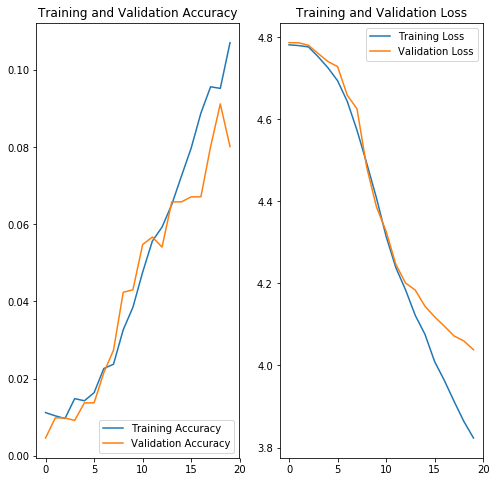

In [0]:
acc = model_results_two.history['acc']
val_acc = model_results_two.history['val_acc']

loss = model_results_two.history['loss']
val_loss = model_results_two.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<a id='step3'></a>

## Step 3: Use a CNN to Classify Dog Breeds - Using Transfer Learning

To get to a model we can use to classify these images we need to use transfer learning. Transfer learning uses neural networks that has been trained on a large set of images already. This means we will not start from scracth building a completly new network. Instead we use the network for feature learning and then add our own classification layers on to this. 
<br><br>
I will be using two different models. One smaller `MobileNet v2` and one very large `ResNet-50`. Hopefully we will get some better results using one of these pretrained neural nets. 

First we will try **MobileNet v2**. To be able to use it we need to download it using the `[tf.keras.application](https://)` function. 

In [0]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


This model expects its input to be normalized to the [-1,1] range. So before passing data to the MobileNet model, you need to convert the input from a range of [0,1] to [-1,1]. Below we do this in the `change_range` function and apply it to the **image_label_ds** dataset.




In [0]:
def change_range(image,label):
  return 2*image-1, label

mobile_ds = image_label_ds.map(change_range)

Next we need to again seperate our data into training, validation and testing datasets. 

In [0]:
DATASET_SIZE = 10222

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset_mobile = mobile_ds.take(train_size)
test_dataset_mobile = mobile_ds.skip(train_size)
val_dataset_mobile = test_dataset_mobile.skip(val_size)
test_dataset_mobile = test_dataset_mobile.take(test_size)

After this we again make sure we shuffle the data, add the repeat function and also the prefetch and the batch function to the training dataset. 

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset_mobile = train_dataset_mobile.shuffle(train_size)
train_dataset_mobile = train_dataset_mobile.repeat()
train_dataset_mobile = train_dataset_mobile.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset_mobile = train_dataset_mobile.prefetch(buffer_size=AUTOTUNE)

test_dataset_mobile = test_dataset_mobile.batch(BATCH_SIZE)
val_dataset_mobile = val_dataset_mobile.batch(BATCH_SIZE)

The architecture for our model will consist of the MobileNet Pre-Trained model for feature learning. To this we add one layer for global average pooling and one dense layer for classification. 

In [0]:
model_mobile = tf.keras.models.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(120, activation='softmax')
])

We compile the model. 

In [0]:
model_mobile.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
model_mobile.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


For training we will use 20 epochs and see how we will do. Lets go...

In [0]:
EPOCHS=20
model_results_mobile = model_mobile.fit(train_dataset_mobile,
          validation_data=val_dataset_mobile,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy()
         )

Epoch 1/20
224/224 [==============================] - 51s 229ms/step - loss: 2.4588 - acc: 0.4393 - val_loss: 1.0175 - val_acc: 0.7190
Epoch 2/20
224/224 [==============================] - 37s 164ms/step - loss: 0.9821 - acc: 0.7425 - val_loss: 0.8295 - val_acc: 0.7503
Epoch 3/20
224/224 [==============================] - 37s 164ms/step - loss: 0.6772 - acc: 0.8266 - val_loss: 0.7738 - val_acc: 0.7608
Epoch 4/20
224/224 [==============================] - 37s 164ms/step - loss: 0.5139 - acc: 0.8749 - val_loss: 0.7564 - val_acc: 0.7660
Epoch 5/20
224/224 [==============================] - 37s 164ms/step - loss: 0.4059 - acc: 0.9029 - val_loss: 0.7175 - val_acc: 0.7777
Epoch 6/20
224/224 [==============================] - 37s 165ms/step - loss: 0.3292 - acc: 0.9240 - val_loss: 0.7485 - val_acc: 0.7653
Epoch 7/20
224/224 [==============================] - 37s 165ms/step - loss: 0.2713 - acc: 0.9390 - val_loss: 0.7575 - val_acc: 0.7692
Epoch 8/20
224/224 [==============================] - 3

In [0]:
model_mobile.evaluate(test_dataset_mobile,
               verbose=1
               )

48/48 [==============================] - 16s 326ms/step - loss: 0.8710 - acc: 0.7684


[0.8710353697339693, 0.7684279]

**Results** - Okey. Now we see some results we can work with. We get a accuracy of 76% on the test data and 77,5% on the validation data. The model learns very quickly and we dont need more than 5 epochs for the model to get to the highest levels of accuracy. One problem is that we can see that the model is still overfitting and in the end we get a accuracy on the training data of 99% while 77% accuracy on the validation data. See below for more input on the loss and accuracy different between the training and the validation data. We still have work to do to make the model not overfit this much and we will get back to this after trying the ResNet model as the pre-trained model. 

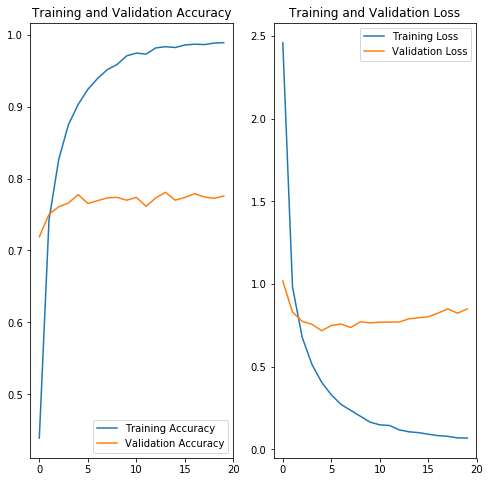

In [0]:
acc = model_results_mobile.history['acc']
val_acc = model_results_mobile.history['val_acc']

loss = model_results_mobile.history['loss']
val_loss = model_results_mobile.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Secondly we will use **ResNet50**. To be able to use it we again need to use the `tf.keras.application` function. 

In [0]:
res_net = tf.keras.applications.resnet50.ResNet50(input_shape=[224,224,3], include_top=False, weights='imagenet')
res_net.trainable=False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


We create our datasets. 

In [0]:
DATASET_SIZE = 10222

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset_resnet = image_label_ds.take(train_size)
test_dataset_resnet = image_label_ds.skip(train_size)
val_dataset_resnet = test_dataset_resnet.skip(val_size)
test_dataset_resnet = test_dataset_resnet.take(test_size)

We add methods for training. 

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset_resnet = train_dataset_resnet.shuffle(train_size)
train_dataset_resnet = train_dataset_resnet.repeat()
train_dataset_resnet = train_dataset_resnet.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset_resnet = train_dataset_resnet.prefetch(buffer_size=AUTOTUNE)

test_dataset_resnet = test_dataset_resnet.batch(BATCH_SIZE)
val_dataset_resnet = val_dataset_resnet.batch(BATCH_SIZE)

We create our new architecture with the **`ResNet50`** model as base. We do not change anything else. This to be able to compare the results to the previous model we created with MobileNet. 

In [0]:
model_resnet = tf.keras.models.Sequential([
  res_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(120, activation='softmax')
])

We compile the model. 

In [0]:
model_resnet.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
model_resnet.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               245880    
Total params: 23,833,592
Trainable params: 245,880
Non-trainable params: 23,587,712
_________________________________________________________________


We start using 10 epochs for training and see how the model behaves and then we possibly change to 20 depending on the results. 

In [0]:
EPOCHS=10
model_results_resnet = model_resnet.fit(train_dataset_resnet,
          validation_data=val_dataset_resnet,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy()
         )

Epoch 1/10
224/224 [==============================] - 92s 410ms/step - loss: 2.9661 - acc: 0.3174 - val_loss: 5.3750 - val_acc: 0.0117
Epoch 2/10
224/224 [==============================] - 75s 337ms/step - loss: 1.1933 - acc: 0.6836 - val_loss: 5.5105 - val_acc: 0.0065
Epoch 3/10
224/224 [==============================] - 76s 341ms/step - loss: 0.7476 - acc: 0.8104 - val_loss: 5.6704 - val_acc: 0.0065
Epoch 4/10
224/224 [==============================] - 76s 341ms/step - loss: 0.5095 - acc: 0.8828 - val_loss: 5.8393 - val_acc: 0.0065
Epoch 5/10
224/224 [==============================] - 76s 341ms/step - loss: 0.3524 - acc: 0.9323 - val_loss: 5.9661 - val_acc: 0.0072
Epoch 6/10
224/224 [==============================] - 77s 342ms/step - loss: 0.2543 - acc: 0.9629 - val_loss: 6.1139 - val_acc: 0.0072
Epoch 7/10
224/224 [==============================] - 77s 342ms/step - loss: 0.2045 - acc: 0.9721 - val_loss: 6.2046 - val_acc: 0.0098
Epoch 8/10
224/224 [==============================] - 7

In [0]:
model_resnet.evaluate(test_dataset_resnet,
               verbose=1
               )

48/48 [==============================] - 22s 453ms/step - loss: 6.3993 - acc: 0.0130


[6.399287084738414, 0.013046314]

**Results** - Very dissapointing results with a accuracy of 1.3% accuracy on the test data. The model is way to complex and is overfitting. The accuracy of the training data is almost 100% but as said only around 1% on the test and validation data. The ResNet model seems to be to complex with its 50 layers for feature learning and does not do a good job on the test and validation data. See below illustration for details into the differens between loss and accuracy between training and test/validation. 

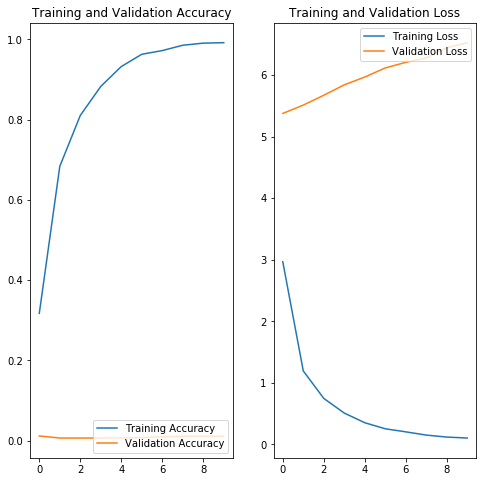

In [0]:
acc = model_results_resnet.history['acc']
val_acc = model_results_resnet.history['val_acc']

loss = model_results_resnet.history['loss']
val_loss = model_results_resnet.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<a id='step4'></a>

# Step 4. Data Augmentation

After training on the original images we got a test accuracy of 77% as the maximum value from all the models we trained. Altough this is a pretty good result the model was overfitting. Now its time to look into another way of possibly removing some of the overfitting. We will augment the images using functions to create new images that we use to train the network. Possible augmentation areas could be changing the original image orientation (flipping and rotation) color (hue, saturation, brightness, contrast) and 
zooming. I will focus on the two first options image **orientation** and **color** within this project. 

### Rotation and flipping

One of the most simplest augmentations is rotating the image 90 degrees. For this we can use the rot90 function of Tensorflow. To get a new random rotation for each image we need to use a random function from Tensorflow itself. Random functions from Tensorflow are evaluated for every input, functions from numpy or basic python only once which would result in a static augmentation.

Below I create three functions to augment the images.

In [0]:
def rotate(x: tf.Tensor) -> tf.Tensor:
    """Rotation augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """

    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(x, tf.random_uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

In [0]:
def flip(x: tf.Tensor) -> tf.Tensor:
    """Flip augmentation

    Args:
        x: Image to flip

    Returns:
        Augmented image
    """
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)

    return x

### Color augmentations

Color augmentations are applicable to almost every image learning task. In Tensorflow there are four color augmentations readily available: hue, saturation, brightness and contrast. These functions only require a range and will result in an unique augmentation for each image.

In [0]:
def color(x: tf.Tensor) -> tf.Tensor:
    """Color augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_hue(x, 0.3)
    x = tf.image.random_saturation(x, 0.5, 1.3)
    x = tf.image.random_brightness(x, max_delta=0.2)
    x = tf.image.random_contrast(x, 0.2, 0.8)
    return x

### Function to plot images after augmentation

In [0]:
def plot_images_new(dataset, n_images):
  plt.figure(figsize=(8,8))
  for n,image in enumerate(dataset.take(n_images)):
    #plt.subplot(10,10,n+1)
    plt.imshow(image)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()

### Dataset

To be able to see how good the model performs on real data we still need our validation and test data not to be altered or agumented. The only data we should apply augmentation on should be on the training data. 

In [0]:
# Size of the training size after adding the new augmented images. 
train_size_aug = 10733

# Training data
train_images_ds = image_ds.take(train_size)
train_labels_ds = label_ds.take(train_size)

# Test + Validation data
test_images_ds = image_ds.skip(train_size)
test_labels_ds = label_ds.skip(train_size)

# Validation data
validation_images_ds = test_images_ds.skip(val_size)
validation_labels_ds = test_labels_ds.skip(val_size)

# Test data
test_images_ds = test_images_ds.take(test_size)
test_labels_ds = test_labels_ds.take(test_size)



Seperate half of the images for augmentation and addition to initial dataset.

In [0]:
augment_images = train_images_ds.take(3578)
augment_labels = train_labels_ds.take(3578)


### Apply augmentation on Tensorflow dataset

Below I make use of the augmentation functions and apply them to data. I also plot 10 of the images to see how they look after the augmentation. 

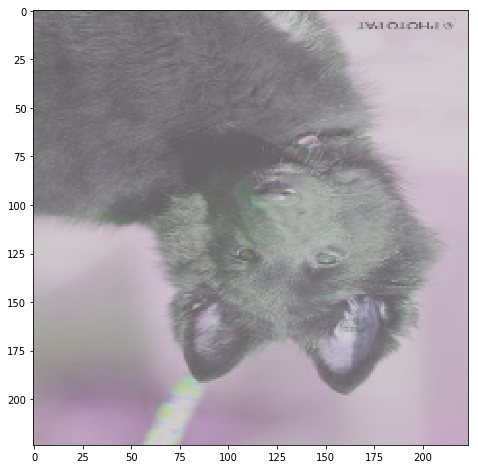

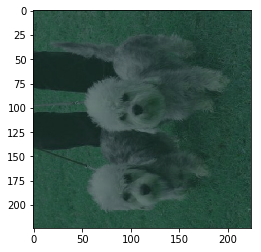

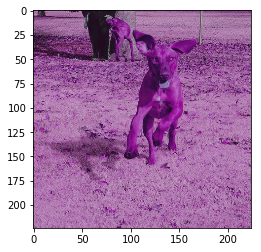

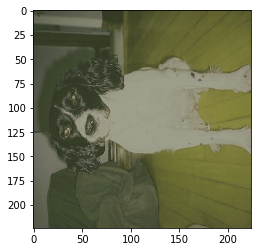

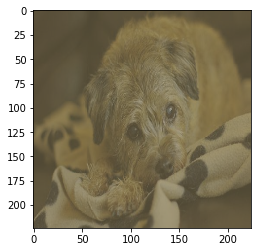

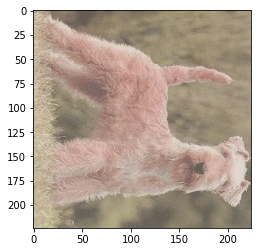

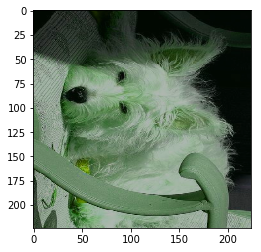

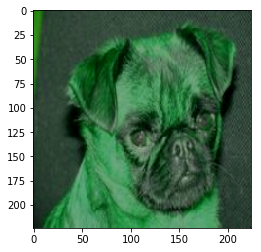

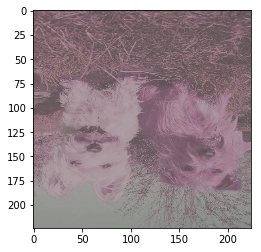

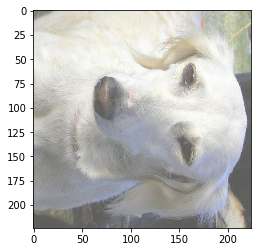

In [0]:
# Add augmentations
augmentations = [flip, rotate]

# Add the augmentations to the dataset (100% of the data)
for f in augmentations:
    # Apply the augmentation, run 4 jobs in parallel.(num_parallel_calls=4)
    augment_images = augment_images.map(f)
    

augment_images = augment_images.map(color)
# Add the augmentations to the dataset (25% of the data)
#for f in augmentations:
    # Apply an augmentation only in 25% of the cases.
 #   train_images_ds_aug = train_images_ds.map(lambda x: tf.cond(tf.random_uniform([], 0, 1) > 0.75, lambda: f(x), lambda: x), num_parallel_calls=4)

# Make sure that the values are still in [0, 1]
augment_images = augment_images.map(lambda x: tf.clip_by_value(x, 0, 1), num_parallel_calls=4)

plot_images_new(augment_images, 10)

After creating the images we concatenate the datasets into one dataset. Going from a little over 7000 images in the training set into over 10000. 

In [0]:
# Training data
train_images_ds = train_images_ds.concatenate(augment_images)
train_labels_ds = train_labels_ds.concatenate(augment_labels)

<a id='step5'></a>

# Step 5. Training new CNN after Data Augmentation

Okey. Now its time to do everything again and train a new neural network with the new training set which includes the augmented images. 

First we add the labels to the train, test and validation dataset with the `zip` function. 

In [0]:
# Create Training dataset with labels
train_ds_aug = tf.data.Dataset.zip((train_images_ds, train_labels_ds))

# Create Test dataset with labels
test_ds_aug = tf.data.Dataset.zip((test_images_ds, test_labels_ds))

# Create Validation dataset with labels
validation_ds_aug = tf.data.Dataset.zip((validation_images_ds, validation_labels_ds))


To use the **MobileNet** for transfer learning we need to re-shape our tensors.

In [0]:
train_ds_aug = train_ds_aug.map(change_range)
test_ds_aug = test_ds_aug.map(change_range)
validation_ds_aug = validation_ds_aug.map(change_range)


Add methods for training.

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_ds_aug = train_ds_aug.shuffle(train_size_aug)
train_ds_aug = train_ds_aug.repeat()
train_ds_aug = train_ds_aug.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_ds_aug = train_ds_aug.prefetch(buffer_size=AUTOTUNE)

test_ds_aug = test_ds_aug.batch(BATCH_SIZE)
validation_ds_aug = validation_ds_aug.batch(BATCH_SIZE)

We create the architecture based on the **MobileNet** pre-trained network. 

In [0]:
model_mobile_augmented = tf.keras.models.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(120, activation='softmax')
])

Compile and visualize the network. 

In [0]:
model_mobile_augmented.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
model_mobile_augmented.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


Time to train. We will do this for 20 epochs just as before and see if we can see anything change from the last training done with the same architecture but without the addition of the augmented images. 

In [0]:
EPOCHS=20
model_results_mobile_aug = model_mobile_augmented.fit(train_ds_aug,
          validation_data=validation_ds_aug,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size_aug/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy()
         )

Epoch 1/20
336/336 [==============================] - 83s 248ms/step - loss: 2.6600 - acc: 0.3981 - val_loss: 0.9728 - val_acc: 0.7229
Epoch 2/20
336/336 [==============================] - 52s 156ms/step - loss: 1.5301 - acc: 0.6136 - val_loss: 0.7543 - val_acc: 0.7744
Epoch 3/20
336/336 [==============================] - 52s 154ms/step - loss: 1.2806 - acc: 0.6714 - val_loss: 0.7282 - val_acc: 0.7771
Epoch 4/20
336/336 [==============================] - 52s 155ms/step - loss: 1.1316 - acc: 0.7067 - val_loss: 0.7256 - val_acc: 0.7803
Epoch 5/20
336/336 [==============================] - 52s 154ms/step - loss: 1.0472 - acc: 0.7276 - val_loss: 0.7564 - val_acc: 0.7757
Epoch 6/20
336/336 [==============================] - 51s 151ms/step - loss: 0.9967 - acc: 0.7430 - val_loss: 0.7266 - val_acc: 0.7771
Epoch 7/20
336/336 [==============================] - 47s 140ms/step - loss: 0.9364 - acc: 0.7568 - val_loss: 0.7189 - val_acc: 0.7855
Epoch 8/20
336/336 [==============================] - 4

In [0]:
model_mobile_augmented.evaluate(test_ds_aug,
               verbose=1
               )

48/48 [==============================] - 12s 260ms/step - loss: 0.8562 - acc: 0.7652


[0.8562179055685798, 0.76516634]

**Results** - as we see above we did not get a big impact on the accuracy on the test data. It is still on a level of 76%.  This said we have got at different results on the training data. The overfitting is not at all at the same level as before and it is now a mere 7% difference between training accuracy and validation/test accuracy compared to 25% on the previous model. This is good as we are not forming the model just against its training data anymore but instead creating a more general model. Next steps to improve this model even further would be to look over the architecture again as we now have removed most of the overfitting. 
<br><br>
This work is something I will look into sometime in the near future. Below is a graph showing us how the training, loss and accuracy developed during the training. We can also see that training after 10 epochs was not needed as this is where the accuracy fades out and stabalizes. 

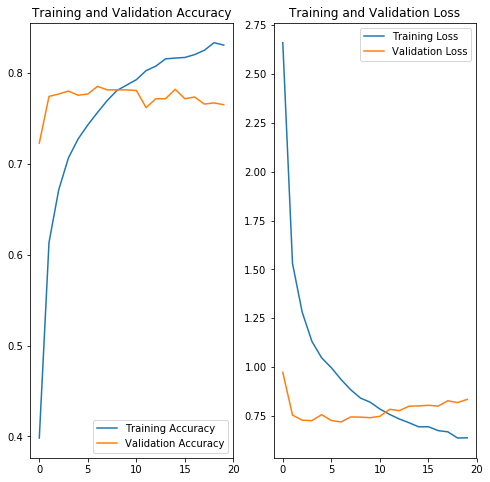

In [0]:
acc = model_results_mobile_aug.history['acc']
val_acc = model_results_mobile_aug.history['val_acc']

loss = model_results_mobile_aug.history['loss']
val_loss = model_results_mobile_aug.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<a id='step6'></a>

 # Step 6 - Save model to use in application

Lets now save the model we have created using Transfer Learning with MobileNet and Image Augmentation. We do this by using the `save` method on the created model. This will let us use the created model in other notebooks and applications. 





In [0]:
model_mobile_augmented.save('model_mobileNet_aug.h5')

W0827 13:51:40.526594 140153986549632 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


<a id='step7'></a>

# Step 7 - Discussion & Conclusions

* Get an understanding of Tensorflow as a deep learning library
* Explore different options of data preperation for deep learning with Tensorflow
* Explore different options of data agumentation with the use of Tensorflow
* Create a Image Classifier using a Convolutional Neural Network from scratch
* Create a Image Classifier using a Convolutional Neural Network with the use of Transfer Learning

### Conclusions and discussion points



After working on this project I learned a lot around how to work with Tensorflow and what options and tools you have at your disposal. Below follow some thoughts and conclusions within a couple of areas. 

<b>Data preparation</b> - When loading images into a format that can be used by Tensorflow to build a neural network(tensors) one could use different methods. These methods seems to depend a bit on how you have organised your images in the first place. If you have all the images in perfectly divided and seperated folders with different names (labels) and also divided them into train, validation and test you can use a method named ImageDataGenerator via Keras. When I looked into this method it was pretty straight forward and easy to use. If you have the option to organize the data in this way - do it. This way also makes it easy to apply data augmentation features if needed (more on that later).<br><br>
This method could possibly become hard to follow when having more then a 100 categories and lots of data. This was the case in my project here. The data was all in one folder and only had the name (ID) as identifier. Instead we had a labeled list of all those IDs that we could use to categorize the image. This led me to use Tensorflow Datasets. The definition from Tensorflow.<br><br> *A tf.data.Dataset represents a sequence of elements, in which each element contains one or more Tensor objects. For example, in an image pipeline, an element might be a single training example, with a pair of tensors representing the image data and a label.* <br><br>
The way of creating this dataset was not too bad.
1. I used the `Dataset.from_tensor_slices()` method with the image paths as input. This created a Tensorflow Dataset with the images paths as its content.
2. Then I created two functions which handled load and image processing. 
3. These functions could then be used with the `.map` method on the Dataset we created in step 1. 
4. The map method applied the functions on each entry in the dataset and read the images into list of tensors, decoded each tensor, resize to 224,224 pixels and in the end normalized the data to be between 0 and 1.
5. After this we had a dataset with the images only which meant we had to add the labels using the `Dataset.from_tensor_slices()` method again now with the label data as input. 
6. Last step was to `zip` these two datasets together into one dataset consisting of the processed images and corresponding label. 

<b>Building a Neural Network from scratch</b> - using the tensorflow methods and process is pretty straight forward. The steps include.
1. Creating Training, Validation and Test data sets.
2. Setting batch size and adding shuffle methods. 
3. Create and form the Neural Network architecture. 
4. Compile the model and choose optimizer, loss function and what metrics to use. 
5. Train the model and chosing number of epochs
6. Evaluate the model against the test data. 
7. Illustrate the results in graph showing accuracy and loss comparing training and validation data. 

These steps can easily be turned into a function to be used over and over tweaking the different parameters to find a best model after training. 
<br><br>
When looking at the results from the model we created from scratch we sew a very low accuracy rate on the validation and test data but extremly high on the training data. This means we were highly overfitting the model. So we needed to tune the model and make it more general then the initial model. This was done by adding two more convulutional layers in the model and adding a global average pooling layer. After these changes we ended up with a architecture of little over 200.000 parameters. Training the model again over 20 epochs we got a results of 10% accuracy on the training data, 8% on the validation data and 8% on the test data. The overfitting disapeared and we only have a 2% difference in-between the training and test/validation data. 
<br><br>
Even though this is progress we still only have a model with 8% accuracy from running 20 training runs and using a dataset size of total 10.000 images. 
<br><br>
This gives us a hint on how much is needed to actually create a model with higher accuracy. First of all we need lots of time to run the training. The 20 runs we did here took 15 min using a low-cost GPU and a batch size of 32. Just expanding this to 80 epochs means we are looking at an hour per training run. Second we need more images to train on. Just comparing with the ImageNet project we know that they have over a million images for training and validation and we are not even close to this here. 
<br><br>
These two points above lead us into the area of transfer learning. Transfer learning is when you use another model that has already been trained on a larger image set, such as the ImageNet project, and then apply it to the images you have within your project. In my case dogs. 



<b>Using transfer learning</b> - when implementing transfer learning I decided to test two different previously trained models which is publically available, MobileNet v2 and ResNet-50. Both can be downloaded and imported using the tensorflow and keras library an off you go. <br><br>
To make use of these models we create a Neural Network architecture which uses the architecture of the MobileNet and ResNet networks but add our own layers in the end/back for the acutal classification. In our case I used one global average pooling layer and a final dense layer with 120 nodes matching the number of dog breeds we have in our dataset. On important thing here is to not train the parameters of the transfered networks and only train your added layers. For me this ended up in having 150.000 trainable parameters and 2.000.000 non-trainable parameters. 
<br><br>
Besides the downloading and changing the architecture we do not need to to any major changes in the process explained above. After training the model for 20 epochs with the MobileNet network as a base we got a result of 76% on the test dataset. Great! The transfer learning approach seems to be a very good way of making use of highly trained image models for other use cases then it was initially intended for.
<br><br>
MobileNet was only the first model to test. We also tried ResNET-50. Will we get event better results from using this model as base.
<br><br>
No. We did not get a better result. We actually got a really bad one. The model got up to almost 100% on the training data but only 1% on the test data. Again a clear overfitting model. This seems to be a result of the fact that the ResNet model is very large and complex which in our case gives the results of an overfitting model. 
<br><br>
Lesson here is that even though transfer learning works great to train an image model, one need to be aware of the type of model one uses and for what use case. This to avoid the issue of overfitting or for that matter underfitting. In our use case we would use MobileNet but there could possibly be another model that is better and this would be something to test and try going forward to be able to increase the accuracy of the model. 

<b>Data augmentation</b> - the last area to talk about is data augmentation. This was also the last effort I took to in the end create a higher accuracy and a better model within this project. 
<br><br>
So what can data augmentation do for us. Well the goal of data augementation is to get a larger dataset for the model to be trained on. This is done via image alterations or augmentations such as rotating an image, flipping the image, changing the color of the image and zooming in on the image. This is done on part of or all of the training dataset creating new images and in turn expanding the number of images we can use for training. 
<br><br>
For me I took half of the images I had and created new ones with some random form of augmentation. Tensorflow supports this with methods we can use on the dataset. Examples here are; `tf.image.rot90`, `tf.image.random_flip_right`, `tf.image.random_brightness` etc. If we would have used the image generator method which I mentioned earlier these types of augmentations would have been even easier to implement. Just calling the included methods on the data when fitting/training the model and Tensorflow has created and used the augmented images. In my case I had to create functions for each augmentation and then use the map function to apply it to the images before training.
<br><br>
So the question now is if this led to a better accuracy for my model. Unfortunatly again it was a no.
<br><br>
The results was 76% accuracy for the test data. Which still was quite good but not better then my first model without the augmented images. Was the augementation efforts completelty in vain then. Again no. A problem I didnt mention before was that the model I created with 76% accuracy without augmented images was also overfitting. The model had 100% accuracy on the training data. After adding the augmented images we got a traning accuracy of only 83% moving much closer to the test data accuracy. This was all due to the expanded dataset and addition of the augmented images which should be considered to be a very good result and lesson learned. 